### Exploratory Data Analysis
##### Data set: Passengers of the Titanic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data into Python
df_train=pd.read_csv('../data/train.csv', index_col=0)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Text(0, 0.5, 'Number of passengers')

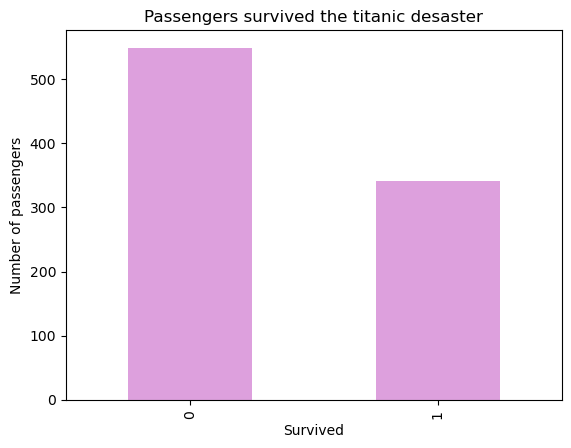

In [3]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot
df_train_survived=df_train.value_counts('Survived')
df_train_survived.plot.bar(color='plum', width=0.5, title= 'Passengers survived the titanic desaster')
plt.ylabel('Number of passengers')


In [4]:

# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers
#Select 1st class passengers
df_train_first_class=df_train[df_train['Pclass'] == 1]
df_train_first_class

#Select 1st class passengers that survived
df_train_first_class_survived=df_train_first_class[df_train_first_class['Survived'] == 1]
df_train_first_class_survived

#Calculate number of 1st class passengers
a=df_train_first_class.value_counts('Pclass')
print(a)

#Calculate number of survived 1st class passengers
b=df_train_first_class_survived.value_counts('Survived')
print(b)

#Calculate proportion of 1st class survivors/total 1st class passengers
x=b/a*100
print(x)


Pclass
1    216
dtype: int64
Survived
1    136
dtype: int64
Survived
1    62.962963
dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

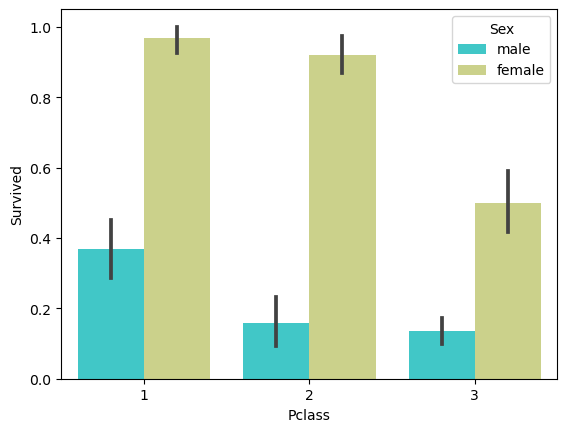

In [5]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers
sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex', palette='rainbow')

Text(0.5, 1.0, 'Age distribution of passengers\n survived the titanic desaster')

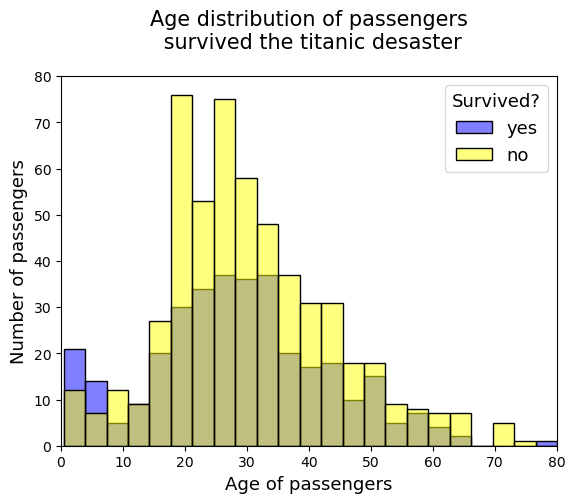

In [7]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers

df_train['Age'].interpolate(inplace=True) #replace missing values by interpolating
sns.histplot(data=df_train, x='Age', hue='Survived', alpha=0.5, palette=['yellow', 'blue'])
plt.xlabel('Age of passengers', fontsize=13)
plt.axis([0, 80, 0, 80])
plt.ylabel('Number of passengers', fontsize=13)
plt.legend(['yes', 'no'], title='Survived?', title_fontsize=13, fontsize=13, loc=1)
plt.title('Age distribution of passengers\n survived the titanic desaster', pad=20, fontsize=15)

In [8]:
# Calculate the average age for survived and drowned passengers separately.
df_train.groupby('Survived')['Age'].mean()

Survived
0    30.407787
1    28.631711
Name: Age, dtype: float64

In [9]:
# Replace missing age values by the mean age.
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train.isna().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female
df_train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64